# 1.1 DW - Estructuración y limpieza de missings

En esta etapa trabajaremos con las observaciones hechas en la etapa anterior, con el fin de generar una base de datos con los datos acordes para el análisis.
Como estamos trabajando con dos set de datos que no tienen relacion alguna, los seguiremos trabajando por separado para luego unificarlos

## Import libraries

In [1]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.word_cloud import words_cloud
from src.utils.statistics import calculate_frequency_values

## Set up

In [4]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

In [5]:
# Definimos el constantes de colores de acuerdo al negocio para usar en los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [6]:
# Obtenemos la ruta de los csv's que vamos a utilizar
CHEMICAL_WINE_RAW_PATH = data_dir("raw", "wine_dataset.csv")
COMERCIAL_WINE_RAW_PATH = data_dir("raw", "wines_SPA.csv")

CHEMICAL_WINE_RAW_PATH , COMERCIAL_WINE_RAW_PATH

(WindowsPath('c:/Users/cvigo/data-projects/proyecto-final-vinos/vinos-corderhouse/data/raw/wine_dataset.csv'),
 WindowsPath('c:/Users/cvigo/data-projects/proyecto-final-vinos/vinos-corderhouse/data/raw/wines_SPA.csv'))

In [12]:
# Leemos los csv's y los guardamos en un dataframe
df_wine_chemical = pd.read_csv(CHEMICAL_WINE_RAW_PATH)
df_wine_comercial = pd.read_csv(COMERCIAL_WINE_RAW_PATH)

## Dataset Quimico

### Estructuracion

En la etapa anterior observamos que no habia muchas cosas para trabajar desde la estructuración con este dataset y que tampoco tenia valores faltantes. Lo unico que tenemos que hacer es cambiar el tipo de dato de las columna `quality` y `style` a categoricas

In [8]:
df_wine_chemical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
# Convertimos los tipos de datos de las columnas quality y style a categoricas
df_wine_chemical["quality"] = df_wine_chemical["quality"] = df_wine_chemical["quality"].astype("category").cat.as_ordered()
df_wine_chemical["style"] = df_wine_chemical["style"].astype("category")

In [14]:
df_wine_chemical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6497 non-null   float64 
 1   volatile_acidity      6497 non-null   float64 
 2   citric_acid           6497 non-null   float64 
 3   residual_sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free_sulfur_dioxide   6497 non-null   float64 
 6   total_sulfur_dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   category
 12  style                 6497 non-null   category
dtypes: category(2), float64(11)
memory usage: 571.6 KB


Como el dataset no set no tenia valores faltantes no hay que hacer ninguna limpieza de missing values. 

In [15]:
# Guardamos el dataframe en un archivo csv
df_wine_chemical.to_csv(data_dir("intermediate", "structured_chemical.csv"), index=False)

## Dataset Comercial

## Missing values

De la etapa anterior salio trabajar los valores faltantes de las variables:
- type
- body
- acidity
- year

Antes de empezar podemos corroborar si hay filas con todos los valores faltantes.

In [475]:
df_wine_comercial.isna()[(df_wine_comercial.isna() == True).all(axis='columns')]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity


In [476]:
#Tambien obtenemos la cantidad de filas que tienen al menos un valor faltante.
index_missing_comercial = df_wine_comercial.isna()[(df_wine_comercial.isna() == True).any(axis='columns')].index
df_wine_comercial.loc[index_missing_comercial].sample(5)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
6292,Matsu,El Viejo,2019,4.2,400,Espana,Toro,27.89,Toro Red,NaN,NaN
5914,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90,NaN,NaN,NaN
1142,R. Lopez de Heredia,Vina Tondonia Reserva,2009,4.3,2423,Espana,Rioja,35.09,Rioja Red,NaN,NaN
6142,Matsu,El Viejo,2019,4.2,400,Espana,Toro,27.89,Toro Red,NaN,NaN
3486,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95,NaN,NaN,NaN


In [477]:
print(f"Tenemos en total {len(index_missing_comercial)} registros con al menos un valor faltante")

Tenemos en total 1171 registros con al menos un valor faltante


In [478]:
# Corroboramos las columnas que tine al menos un valor faltantes
df_wine_comercial.isna().sum()[df_wine_comercial.isna().sum() > 0]

year          2
type        545
body       1169
acidity    1169
dtype: int64

In [479]:
# Revisamos las columnas que tienen valores null
missing_values_table = pd.DataFrame(df_wine_comercial.isna().sum().sort_values(ascending=False)).reset_index()
missing_values_table.columns = ['column', 'missing_values']
missing_values_table['%missing_values'] = round((missing_values_table['missing_values'] / df_wine_comercial.shape[0]) * 100, 3)

missing_values_table

,column,missing_values,%missing_values
0,body,1169,15.587
1,acidity,1169,15.587
2,type,545,7.267
3,year,2,0.027
4,winery,0,0.000
5,wine,0,0.000
6,rating,0,0.000
7,num_reviews,0,0.000
8,country,0,0.000
9,region,0,0.000


### year

In [480]:
# Obtenemos los valores de la columna year
df_wine_comercial.year.value_counts().sort_index()

1910      1
1922      1
1925      1
1928      1
1929      1
       ... 
2018    850
2019    331
2020    474
2021      6
N.V.    288
Name: year, Length: 71, dtype: int64

In [481]:
# Obtenemos los registros donde year es igual 'N.V.'
df_wine_comercial.loc[df_wine_comercial['year'] == 'N.V.'].head()


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
20,Valdespino,Toneles Moscatel,N.V.,4.8,174,Espana,Jerez-Xeres-Sherry,253.00,Sherry,4.0,3.0
133,Barbadillo,Reliquia Palo Cortado Sherry,N.V.,4.7,58,Espana,Jerez Palo Cortado,380.00,Sherry,4.0,3.0
142,Alvear,Abuelo Diego Palo Cortado,N.V.,4.7,42,Espana,Montilla-Moriles,114.28,Pedro Ximenez,5.0,1.0
143,Equipo Navazos,La Bota 78 de Oloroso,N.V.,4.7,41,Espana,Manzanilla,95.57,Sherry,4.0,3.0
267,Osborne,Solera India Oloroso Rare Sherry,N.V.,4.6,74,Espana,Jerez-Xeres-Sherry,189.99,Sherry,4.0,3.0


In [482]:
# Reemplazamos los valores 'N.V.' de year por NaN
df_wine_comercial.loc[df_wine_comercial['year'] == 'N.V.', 'year'] = np.nan

In [483]:
# Verificamos el cambio de valores de year
df_wine_comercial.loc[df_wine_comercial['year'] == 'N.V.'].head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity


In [484]:
# Obtenemos los registros donde year es nan
df_wine_comercial.loc[pd.isna(df_wine_comercial['year'])].head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
20,Valdespino,Toneles Moscatel,NaN,4.8,174,Espana,Jerez-Xeres-Sherry,253.00,Sherry,4.0,3.0
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50,Ribera Del Duero Red,5.0,3.0
133,Barbadillo,Reliquia Palo Cortado Sherry,NaN,4.7,58,Espana,Jerez Palo Cortado,380.00,Sherry,4.0,3.0
142,Alvear,Abuelo Diego Palo Cortado,NaN,4.7,42,Espana,Montilla-Moriles,114.28,Pedro Ximenez,5.0,1.0
143,Equipo Navazos,La Bota 78 de Oloroso,NaN,4.7,41,Espana,Manzanilla,95.57,Sherry,4.0,3.0


In [485]:
# Obtenemos los valores nan de la columna year
index_nan_values_years = df_wine_comercial.loc[pd.isna(df_wine_comercial['year'])].index
df_wine_comercial.loc[index_nan_values_years].head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
20,Valdespino,Toneles Moscatel,NaN,4.8,174,Espana,Jerez-Xeres-Sherry,253.00,Sherry,4.0,3.0
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50,Ribera Del Duero Red,5.0,3.0
133,Barbadillo,Reliquia Palo Cortado Sherry,NaN,4.7,58,Espana,Jerez Palo Cortado,380.00,Sherry,4.0,3.0
142,Alvear,Abuelo Diego Palo Cortado,NaN,4.7,42,Espana,Montilla-Moriles,114.28,Pedro Ximenez,5.0,1.0
143,Equipo Navazos,La Bota 78 de Oloroso,NaN,4.7,41,Espana,Manzanilla,95.57,Sherry,4.0,3.0


In [486]:
print(f"year nan values: {len(index_nan_values_years)} que representan {round(len(index_nan_values_years)/df_wine_comercial.shape[0]*100, 2)}% de los registros")

year nan values: 290 que representan 3.87% de los registros


array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'num_reviews'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'body'}>],
       [<AxesSubplot:title={'center':'acidity'}>, <AxesSubplot:>]],
      dtype=object)

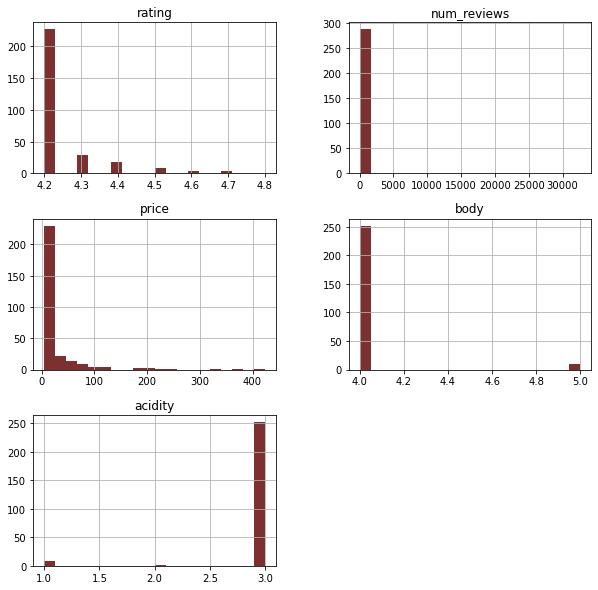

In [487]:
df_wine_comercial.loc[index_nan_values_years].hist( bins=20, figsize=(10,10),color = COLOR_VINO_TINTO)

Como los registros que tienen nan en la columna year se comportan parcido al resto de los datos, y no es un numero relevante para de datos signficativos, podemos eliminar estos registros.

In [488]:
# Eliminamos los registros con valores nan de year
df_wine_comercial.dropna(subset=['year'], inplace=True)

In [489]:
df_wine_comercial.loc[pd.isna(df_wine_comercial['year'])]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity


### type

In [490]:
# Obtenemos los valores nan de la columna type
index_nan_values_type = df_wine_comercial.loc[pd.isna(df_wine_comercial['type'])].index
df_wine_comercial.loc[index_nan_values_type]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7440,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90000,NaN,NaN,NaN
7462,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN
7465,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90000,NaN,NaN,NaN
7487,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN


Vemos un patron al buscar los nulos de type, donde coinciden los NaN de type, body y acidity.

In [491]:
# Obtenemos los registros que tiene NaN en las columnas type , body y acidity en simulataneo
index_nan_values_tba = df_wine_comercial[df_wine_comercial[['type', 'body', 'acidity']].isna().all(axis=1)].index
df_wine_comercial.loc[index_nan_values_tba]



,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7440,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90000,NaN,NaN,NaN
7462,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN
7465,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90000,NaN,NaN,NaN
7487,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN


In [492]:
print(f"Cantidad de registros con valores nan en type, {len(index_nan_values_type)}")
print(f"Cantidad de registros con valores nan en type, body y acidity, {len(index_nan_values_tba)}")

Cantidad de registros con valores nan en type, 538
Cantidad de registros con valores nan en type, body y acidity, 538


Confirmamos que coinciden los registros que tienen nan en la columna type, body y acidity. Rellenar este tipo de registros generaria un sesgo importante para el análisis, por lo que procederemos a eliminar estos registros.

In [493]:
# delete rows which indexes are in index_nan_values_tba
df_wine_comercial.drop(index_nan_values_tba, inplace=True)

In [494]:
df_wine_comercial.loc[pd.isna(df_wine_comercial['type'])]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity


In [495]:
# Verificamos que no hay valores nan en el dataframe
df_wine_comercial.isna().sum()

winery           0
wine             0
year             0
rating           0
num_reviews      0
country          0
region           0
price            0
type             0
body           602
acidity        602
dtype: int64

### body y acidity

Verificamos si los valores NaN de body y acidity coinciden

In [496]:
index_nan_values_bo_ac = df_wine_comercial[df_wine_comercial[['body', 'acidity']].isna().all(axis=1)].index
print(f"La cantidad de NaN en body y acidity es {len(index_nan_values_bo_ac)}")

La cantidad de NaN en body y acidity es 602


Confirmamos que los valores NaN de body y acidity coinciden, entonces procederemos a eliminar estos registros.

In [497]:
# Eliminamos los registros con valores nan en body y acidity
df_wine_comercial.drop(index_nan_values_bo_ac, inplace=True)

Tambien confirmamos que ya no existen valores nulos en nuestro dataset.

In [498]:
# Verificamos que no hay valores nan en el dataframe
df_wine_comercial.isna().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [499]:
df_wine_comercial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6070 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6070 non-null   object 
 1   wine         6070 non-null   object 
 2   year         6070 non-null   object 
 3   rating       6070 non-null   float64
 4   num_reviews  6070 non-null   int64  
 5   country      6070 non-null   object 
 6   region       6070 non-null   object 
 7   price        6070 non-null   float64
 8   type         6070 non-null   object 
 9   body         6070 non-null   float64
 10  acidity      6070 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 569.1+ KB


### Estructuracion

De la etapa anterior identificamos para la estructuracion:
- Cambiar el tipo de la columna `year` a numerica tratando el valor `N.V.` como nulo
- Cambiar el tipo de la columna `body` a categorica
- Estandarizar los valores de la columna `rating` y cambiar el tipo a categorica

In [500]:
df_wine_comercial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6070 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6070 non-null   object 
 1   wine         6070 non-null   object 
 2   year         6070 non-null   object 
 3   rating       6070 non-null   float64
 4   num_reviews  6070 non-null   int64  
 5   country      6070 non-null   object 
 6   region       6070 non-null   object 
 7   price        6070 non-null   float64
 8   type         6070 non-null   object 
 9   body         6070 non-null   float64
 10  acidity      6070 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 569.1+ KB


### year

In [501]:
# Convertimos el tipo de dato de year a numerica
df_wine_comercial["year"] = df_wine_comercial['year'].astype('int')


### body

In [502]:
df_wine_comercial.body.dtype

dtype('float64')

In [503]:
# Obtenemos los valores de la columna body
df_wine_comercial.body.value_counts().sort_index()

2.0      34
3.0     553
4.0    3868
5.0    1615
Name: body, dtype: int64

In [504]:
# convertimos el tipo de dato de body a categoria
df_wine_comercial["body"] = df_wine_comercial["body"].apply(lambda x: f'{x:.0f}').astype("category")

In [505]:
df_wine_comercial.body.dtype

CategoricalDtype(categories=['2', '3', '4', '5'], ordered=False)

### rating

In [506]:
df_wine_comercial.rating.dtype

dtype('float64')

In [507]:
# Obtenemos los valores de la columna rating
values_rating = df_wine_comercial.rating.value_counts().sort_index()
values_rating

4.2    4544
4.3     528
4.4     402
4.5     264
4.6     182
4.7     105
4.8      43
4.9       2
Name: rating, dtype: int64

Como para nosotros la variable rating tiene una representacion categorica ordinal, debemos trabajar la variable como tipo categorica explicitando el orden. 

In [508]:
# convertimos el tipo de dato de rating a categorica y codificamos los valores
df_wine_comercial["rating"] = df_wine_comercial["rating"].astype("category").cat.codes.astype("category").cat.as_ordered()

In [509]:
df_wine_comercial["rating"].dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7], ordered=True)

In [510]:
df_wine_comercial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6070 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   winery       6070 non-null   object  
 1   wine         6070 non-null   object  
 2   year         6070 non-null   int32   
 3   rating       6070 non-null   category
 4   num_reviews  6070 non-null   int64   
 5   country      6070 non-null   object  
 6   region       6070 non-null   object  
 7   price        6070 non-null   float64 
 8   type         6070 non-null   object  
 9   body         6070 non-null   category
 10  acidity      6070 non-null   float64 
dtypes: category(2), float64(2), int32(1), int64(1), object(5)
memory usage: 462.9+ KB


## Coherencia de datos

In [511]:
# Cardinalidad de las columnas categoricas
df_wine_completo_object = df_wine_comercial.select_dtypes(include=['object'])
cardinalidad = pd.DataFrame({'Cantidad' : df_wine_completo_object.nunique(), 'Porcentaje' : ((df_wine_completo_object.nunique()) * 100) / (df_wine_completo_object.shape[0]) })
cardinalidad

,Cantidad,Porcentaje
winery,395,6.507414
wine,677,11.153213
country,1,0.016474
region,63,1.037891
type,21,0.345964


### country

In [512]:
# Revisamos los datos que tiene la columna country
df_wine_comercial.country.value_counts().sort_index()

Espana    6070
Name: country, dtype: int64

Esta variable no tiene relevancia para el análisis, por lo que procederemos a eliminarla.

In [513]:
# Eliminamos la columna country
df_wine_comercial.drop(['country'], axis=1, inplace=True)

In [514]:
df_wine_comercial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6070 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   winery       6070 non-null   object  
 1   wine         6070 non-null   object  
 2   year         6070 non-null   int32   
 3   rating       6070 non-null   category
 4   num_reviews  6070 non-null   int64   
 5   region       6070 non-null   object  
 6   price        6070 non-null   float64 
 7   type         6070 non-null   object  
 8   body         6070 non-null   category
 9   acidity      6070 non-null   float64 
dtypes: category(2), float64(2), int32(1), int64(1), object(4)
memory usage: 415.5+ KB


Podriamos eliminar las demas columnas con alta cardinalidad, pero las vamos a dejar para el EDA.

In [515]:
# Guardamos el dataframe en un archivo csv
#df_wine_comercial
df_wine_comercial.to_csv(data_dir("intermediate", "structured_comercial.csv"), index=False, encoding='utf-8')